# Customer Segmentation and Content Based Recomendation

Hacktiv8 Batch hck-001

- Ferry Marcellus Suhendra
- Hedy Fernando
- Naomi Amelia 
- Raihan Rafif

### Introduction
 
    introduction disini

#### Problem

    problem statement disini

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt
import datetime as dt

2022-10-26 04:06:33.810310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 04:06:33.985331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 04:06:33.985360: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-26 04:06:34.019936: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 04:06:34.696544: W tensorflow/stream_executor/platform/de

## RFM Customer Segmentation

### Data Loading

    info dataset (sumber dataset, info table, deskripsi kolom ) disini

In [2]:
# Loading all .csv data
df_articles = pd.read_csv('articles.csv')
df_customers = pd.read_csv('customers.csv')
df_transaction = pd.read_csv('transactions_train.csv')
pd.set_option('display.max_columns', None)

In [3]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [6]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [8]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [9]:
df_transaction['t_dat'] = pd.to_datetime(df_transaction['t_dat'])

In [10]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


#### Check Missing Values

In [11]:
df_articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [12]:
df_customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [13]:
df_transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

### Drop column not use

In [14]:
# articles
df_articles.drop('detail_desc', axis=1, inplace=True)

In [15]:
# customers drop columns
df_customers.drop(['FN','Active','fashion_news_frequency'], axis=1, inplace=True)

In [16]:
# Drop nan values on age and club member status
age_club_customers_clean = df_customers.dropna(subset=['club_member_status', 'age'])

In [17]:
age_club_customers_clean.isnull().sum()

customer_id           0
club_member_status    0
age                   0
postal_code           0
dtype: int64

#### Check duplicated

In [18]:
len(df_articles.duplicated())

105542

In [19]:
len(df_customers.duplicated())

1371980

### RFM data creation

#### Calculating Recency

In [20]:
df_recency = df_transaction.groupby(by='customer_id', as_index=False)['t_dat'].max()
df_recency.columns = ['customer_id', 'lastpurchasedate']
recent_date = df_recency['lastpurchasedate'].max()
df_recency['recency'] = df_recency['lastpurchasedate'].apply(
    lambda x: (recent_date - x).days)

df_recency.head()

,customer_id,lastpurchasedate,recency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-09-05,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,471
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-08-12,41


#### Calculating Frequency

In [21]:
df_frequency = df_transaction.groupby(by='customer_id', as_index=False)['t_dat'].count()
df_frequency.columns = ['customer_id', 'frequency']
df_frequency.head()

,customer_id,frequency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13


#### Calculating Monetary

In [22]:
df_monetary = df_transaction.groupby('customer_id', as_index=False)['price'].sum()
df_monetary.columns = ['customer_id', 'monetary']
df_monetary.head()

,customer_id,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695


#### Merging RFM

In [23]:
df_rf = df_recency.merge(df_frequency, on='customer_id')
df_rfm = df_rf.merge(df_monetary, on='customer_id').drop(columns='lastpurchasedate')

In [24]:
df_rfm

,customer_id,recency,frequency,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,0.648983
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,2.601932
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,0.704780
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,0.060983
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,0.469695
...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,16,51,1.292356
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,35,84,1.807322
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,13,45,0.788932
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,92,7,0.209203


### Exploratory Data Analysis

In [25]:
def barplot_date(data, x, y):
    plt.figure(figsize=(18,7))
    ax = sns.barplot(data=data, x=x, y=y)
    for i in ax.containers:
        ax.bar_label(i,)

In [31]:
transaction_2018 = df_transaction[(df_transaction['t_dat'] >= '2018-01-01') & (df_transaction['t_dat'] <= '2018-12-31')]
transaction_2019 = df_transaction[(df_transaction['t_dat'] >= '2019-01-01') & (df_transaction['t_dat'] <= '2019-12-31')]
transaction_2020 = df_transaction[(df_transaction['t_dat'] >= '2020-01-01') & (df_transaction['t_dat'] <= '2020-12-31')]

In [27]:
# Total Profit between years
df_transaction.groupby(df_transaction['t_dat'].dt.year)['price'].sum().to_frame()

,price
t_dat,
2018,130873.959305
2019,455604.877966
2020,298167.136780


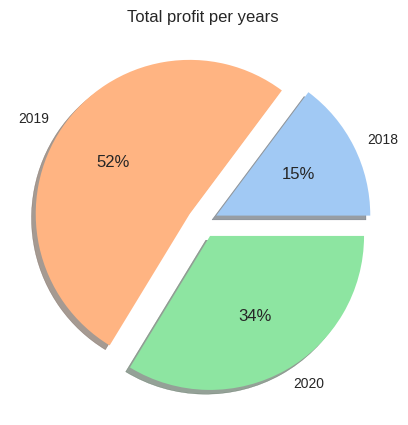

In [69]:
# Create pie chart Total Profit

plt.figure(figsize=(5,5))
plt.title('Total profit per years')

label = df_transaction['t_dat'].dt.year.unique()
colors = sns.color_palette('pastel')
explode = (0.1, 0.1, 0.1)

plt.pie(df_transaction.groupby(df_transaction['t_dat'].dt.year)['price'].sum(),colors=colors,labels=label, explode=explode, 
        autopct='%.0f%%', shadow=True)
plt.show()

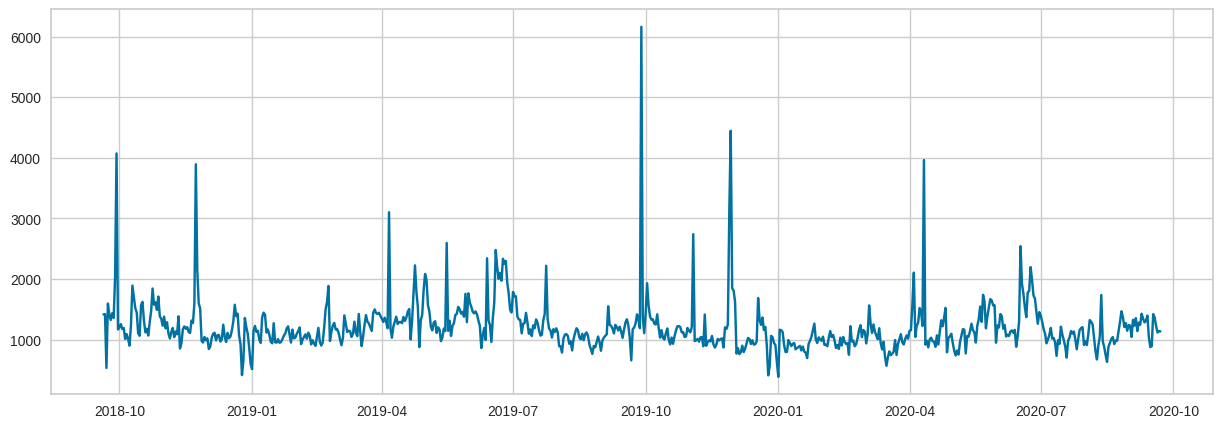

In [29]:
# Price action 2018-2020

plt.figure(figsize=(15,5))
price_line = df_transaction.groupby('t_dat')['price'].sum()
plt.plot(price_line)

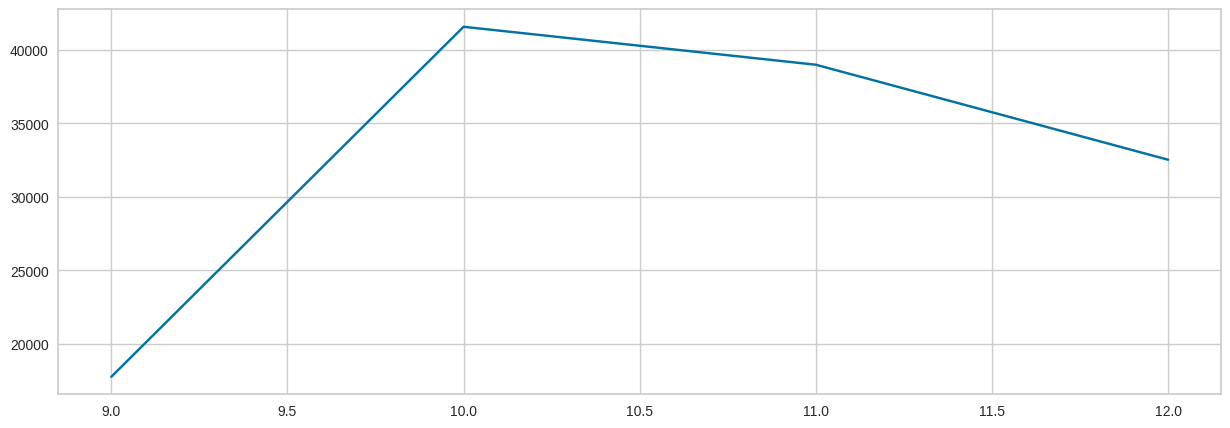

In [32]:
# Price action 2018
plt.figure(figsize=(15,5))
plt.grid=True
price_line = transaction_2018.groupby(transaction_2018['t_dat'].dt.month)['price'].sum()
plt.plot(price_line)

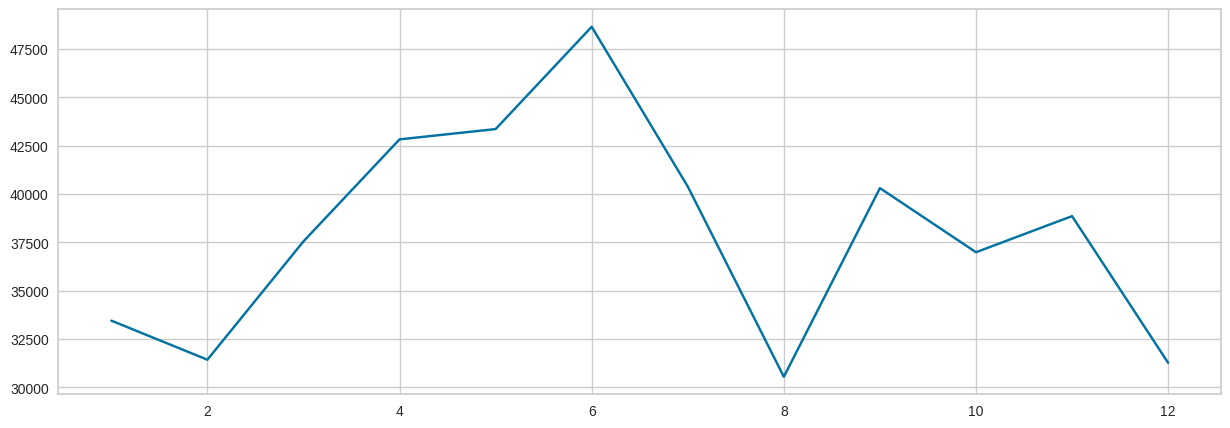

In [66]:
# Price action 2019
plt.figure(figsize=(15,5))
price_line = transaction_2019.groupby(transaction_2019['t_dat'].dt.month)['price'].sum()
plt.plot(price_line)

- 4 - 5 Juni 2019 = Hari Raya Idul Fitri

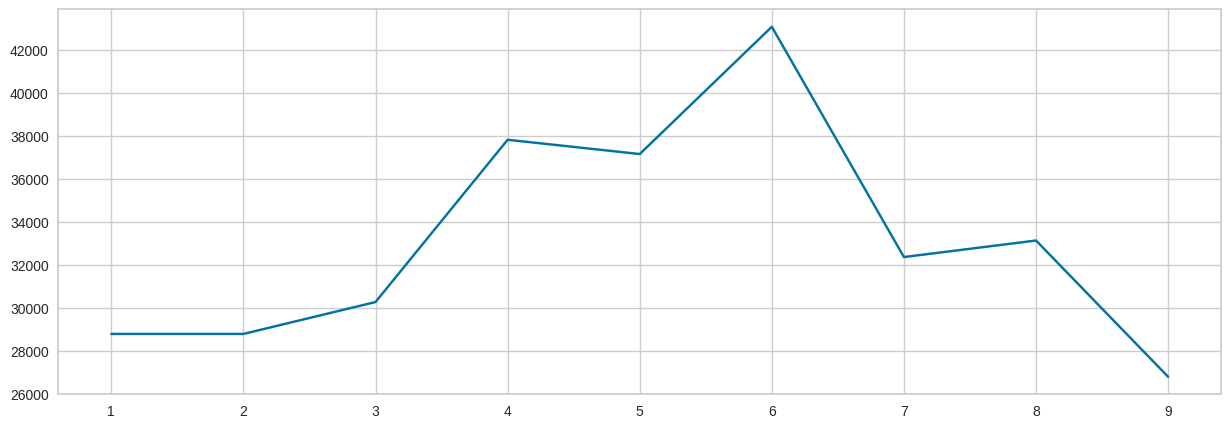

In [62]:
# Price action 2020
plt.figure(figsize=(15,5))
price_line = transaction_2020.groupby(transaction_2020['t_dat'].dt.month)['price'].sum()
plt.plot(price_line)

In [35]:
def barplot(data, x, y):
    plt.figure(figsize=(18,7))
    plt.xticks(rotation = 90)
    ax = sns.barplot(data=data, x=x, y=y)
    for i in ax.containers:
        ax.bar_label(i,)

In [36]:
# Join transaction with articles tables
high_prod = df_transaction.join(df_articles.set_index('article_id'), on='article_id')

# create group by for product name
prod_high = high_prod.groupby(by='prod_name', as_index=False)['article_id'].count()
prod_high.columns = ['prod_name', 'count']

# Sort values from high selling
prod_sort = prod_high.sort_values(by='count', ascending=False)
prod_sort.reset_index(drop=True, inplace=True)
prod_sort.head()

,prod_name,count
0,Jade HW Skinny Denim TRS,168052
1,Luna skinny RW,143216
2,Timeless Midrise Brief,122143
3,Tilly (1),105670
4,Cat Tee.,81304


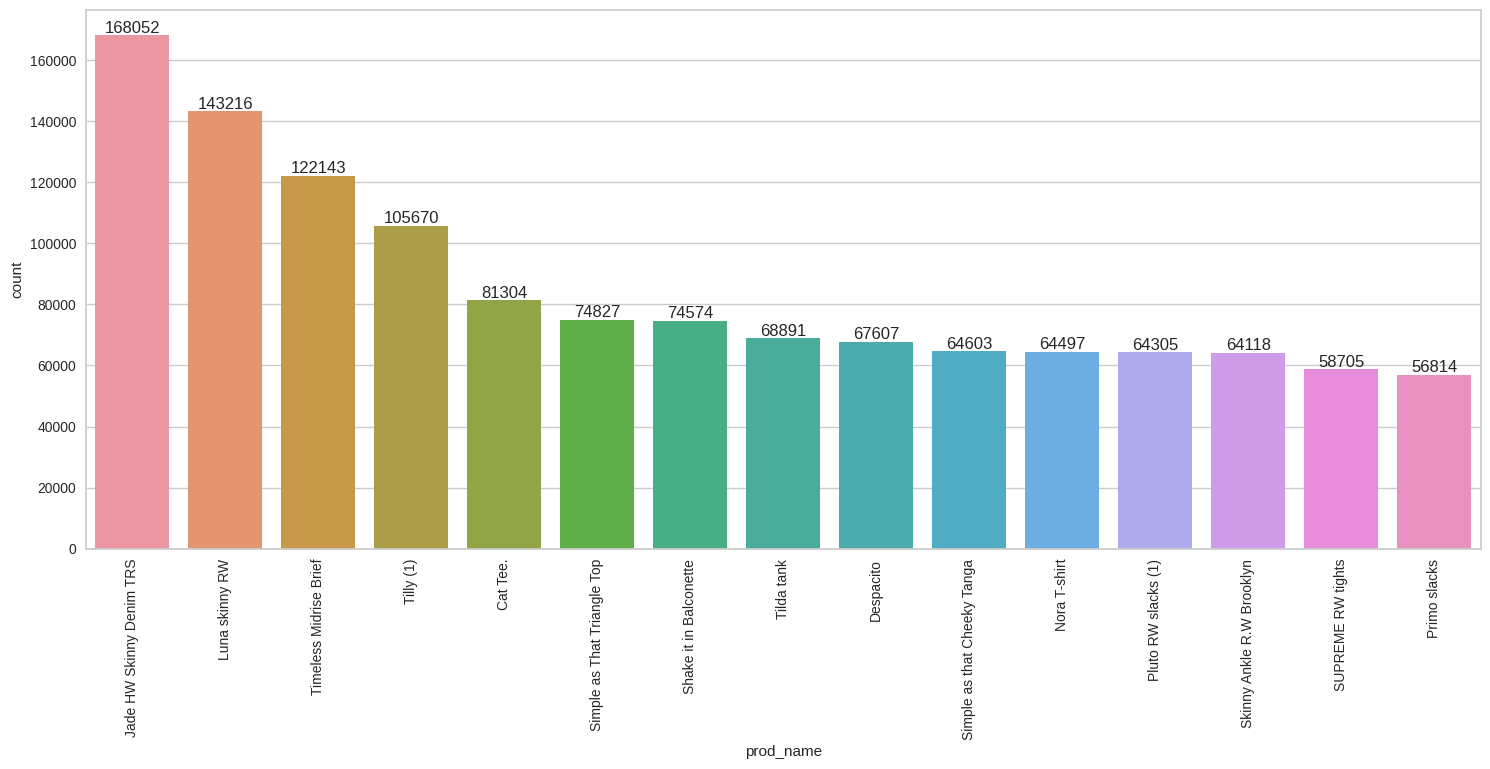

In [37]:
# Product high selling

barplot(prod_sort[:15],'prod_name','count' )

In [38]:
# create group by for product group name
prod_group_n = high_prod.groupby(by='product_group_name', as_index=False)['article_id'].count()
prod_group_n.columns = ['prod_group_name', 'count']

# Sort values from high selling for group
prod_group_sort = prod_group_n.sort_values(by='count', ascending=False)
prod_group_sort.reset_index(drop=True, inplace=True)
prod_group_sort.head()

,prod_group_name,count
0,Garment Upper body,12552755
1,Garment Lower body,7046054
2,Garment Full body,3552470
3,Swimwear,2579222
4,Underwear,2565858


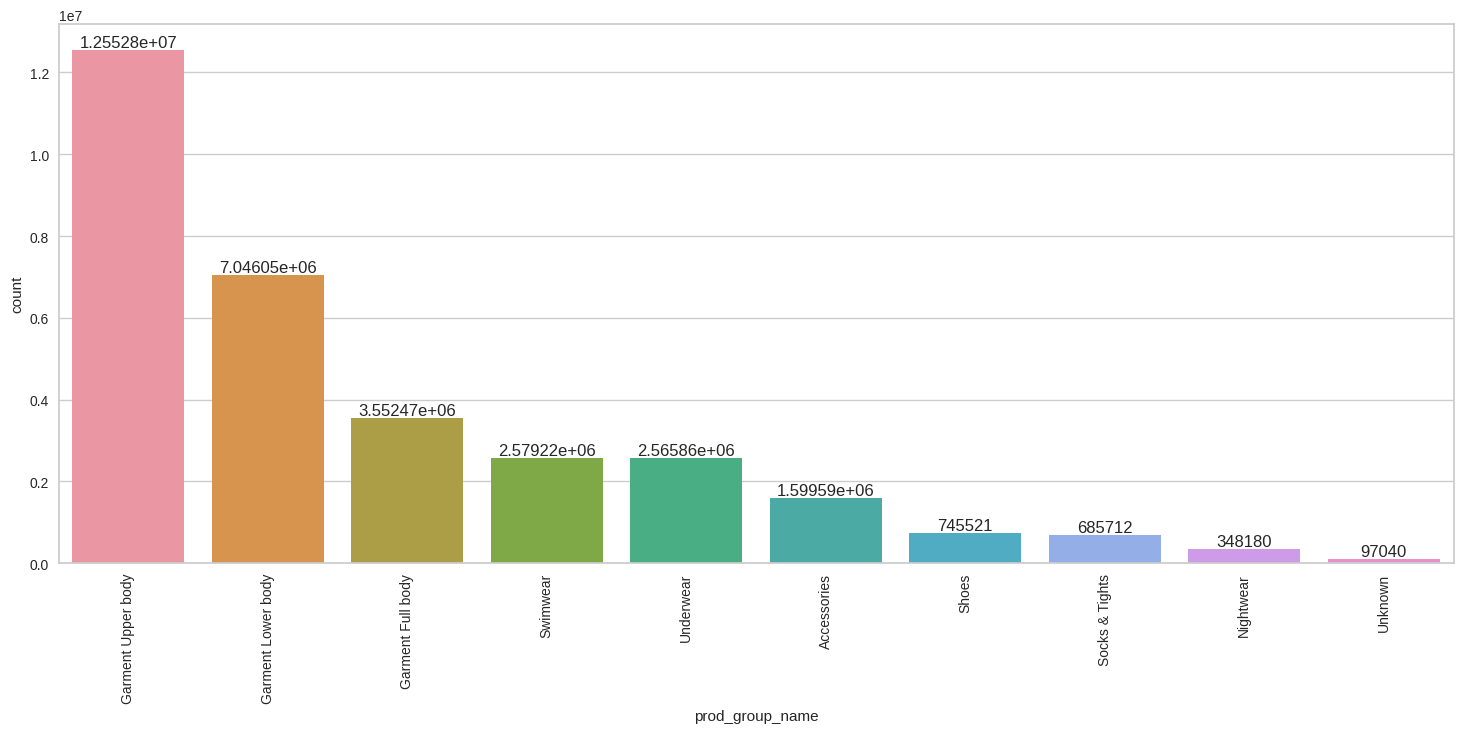

In [41]:
# Product group name

barplot(prod_group_sort[:10],'prod_group_name', 'count')

In [57]:
# create group by for product type name
prod_type_n = high_prod.groupby(by='product_type_name', as_index=False)['article_id'].count()
prod_type_n.columns = ['prod_type_name', 'count']

# Sort values from high selling for type name
prod_type_sort = prod_type_n.sort_values(by='count', ascending=False)
prod_type_sort.reset_index(drop=True, inplace=True)
prod_type_sort.head()

,prod_type_name,count
0,Trousers,4217017
1,Dress,3238428
2,Sweater,2783274
3,T-shirt,2203750
4,Top,1583408


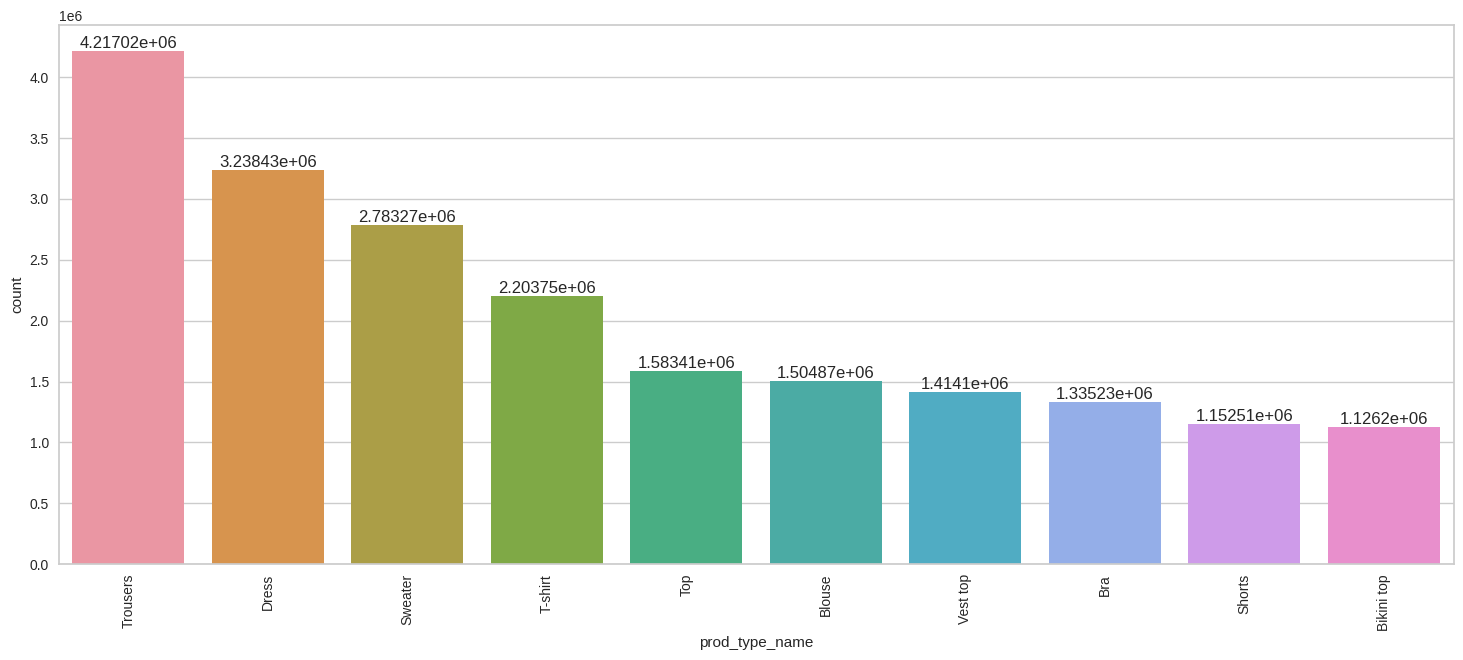

In [58]:
# Product type name

barplot(prod_type_sort[:10],'prod_type_name', 'count')

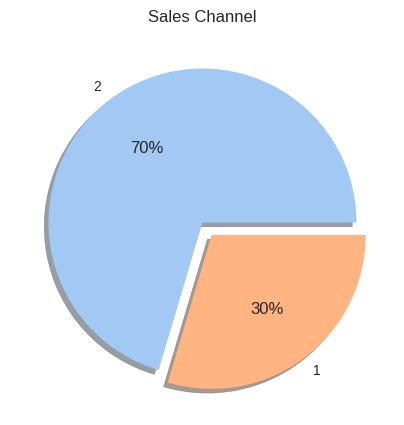

In [42]:
# Create pie chart sales channel

plt.figure(figsize=(5,5))
plt.title('Sales Channel')

label = df_transaction['sales_channel_id'].unique()
colors = sns.color_palette('pastel')
explode = (0, 0.1)

plt.pie(df_transaction['sales_channel_id'].value_counts(),colors=colors,labels=label, explode=explode, 
        autopct='%.0f%%', shadow=True)
plt.show()

In [43]:
age_club_customers_clean['club_member_status'].value_counts()

ACTIVE        1266255
PRE-CREATE      85624
LEFT CLUB         464
Name: club_member_status, dtype: int64

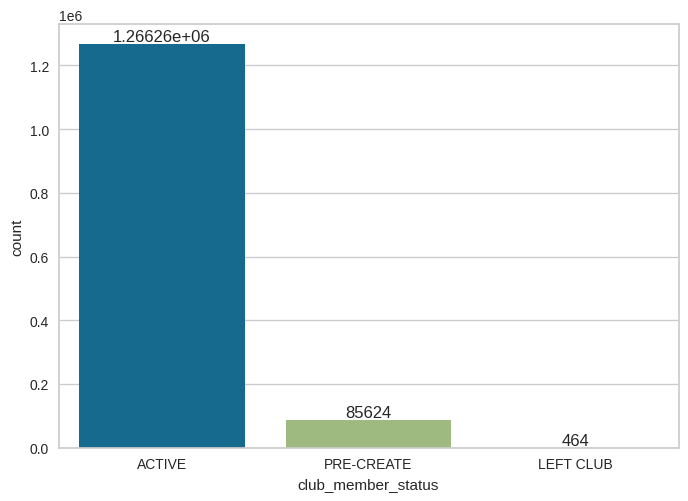

In [44]:
# Club member bar chart
ax = sns.countplot(data=age_club_customers_clean, x='club_member_status')
for i in ax.containers:
    ax.bar_label(i,)

In [45]:
print('Minimal age customers :',age_club_customers_clean['age'].min())
print('Maximal age customers :',age_club_customers_clean['age'].max())

Minimal age customers : 16.0
Maximal age customers : 99.0


In [46]:
# Slicing age in range
age_slice = age_club_customers_clean.copy()
age_slice['age'] = pd.cut(age_slice['age'], [16,25,45,65,99])

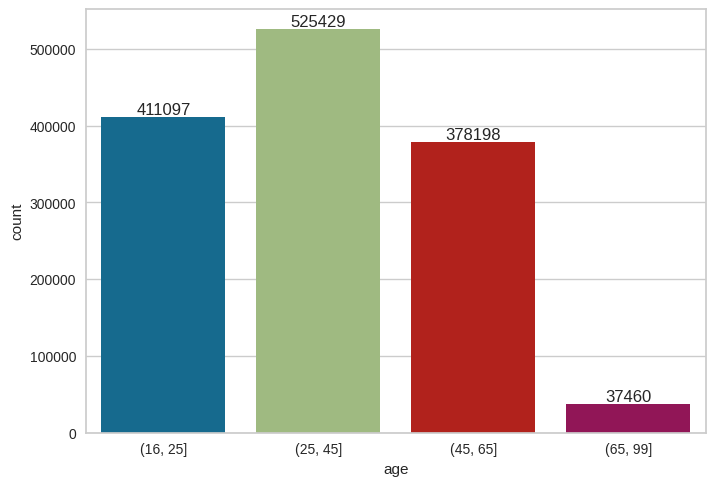

In [47]:
# age in range total

ax = sns.countplot(data=age_slice, x='age')
for i in ax.containers:
    ax.bar_label(i,)

- 16 - 25 = Remaja
- 25 - 45 = Dewasa
- 45 - 65 = Lansia awal
- 65 - 99 = Lansia akhir

In [48]:
# Join transaction with age range
transaction_age = df_transaction.merge(age_slice, on='customer_id')

In [49]:
# create group by for age count repeat order
t_age_repeat = transaction_age.groupby(by='age', as_index=False)['article_id'].count()
t_age_repeat.columns = ['age', 'repeat_order']
t_age_repeat

,age,repeat_order
0,"(16, 25]",8091649
1,"(25, 45]",14548787
2,"(45, 65]",8476685
3,"(65, 99]",480936


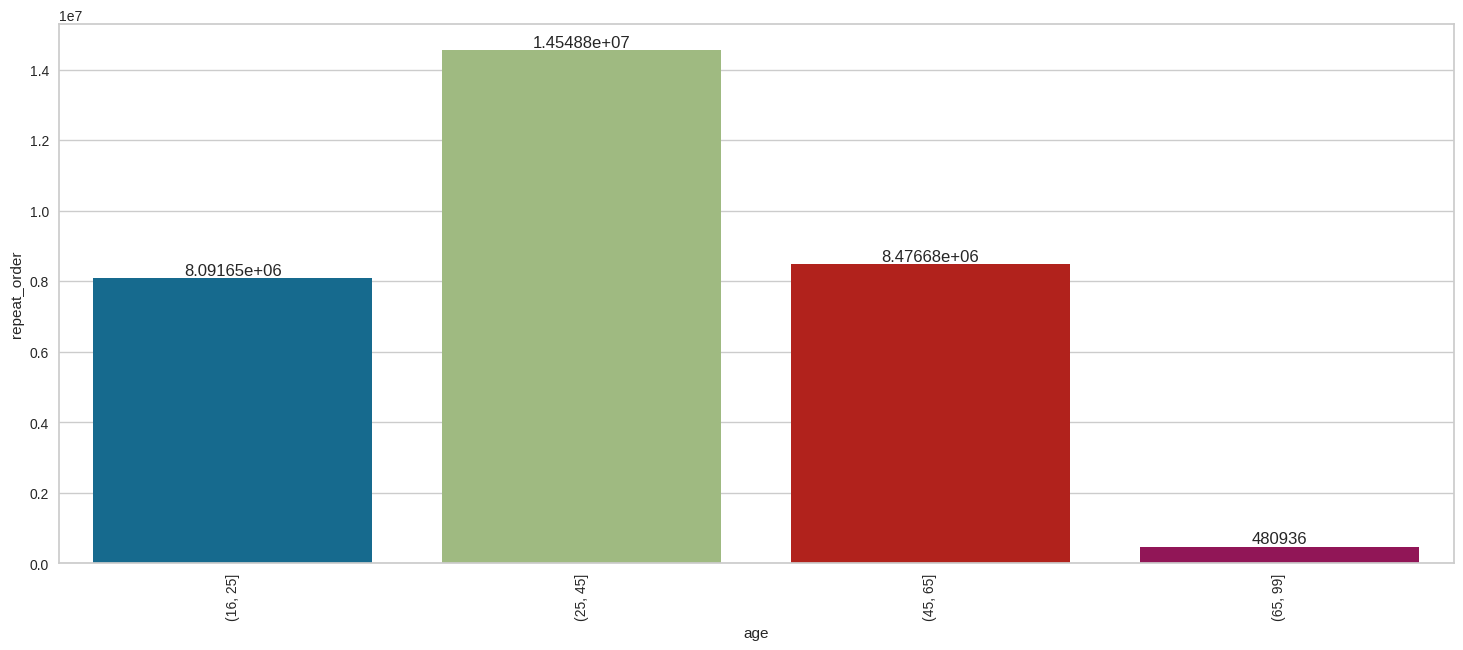

In [50]:
# Count repeat order by age

barplot(t_age_repeat,'age','repeat_order')

In [51]:
# create group by for age count price
t_age_price = transaction_age.groupby(by='age', as_index=False)['price'].sum()
t_age_price.columns = ['age', 'sum_price']
t_age_price

,age,sum_price
0,"(16, 25]",211995.977119
1,"(25, 45]",405946.364559
2,"(45, 65]",246652.350898
3,"(65, 99]",14792.359136


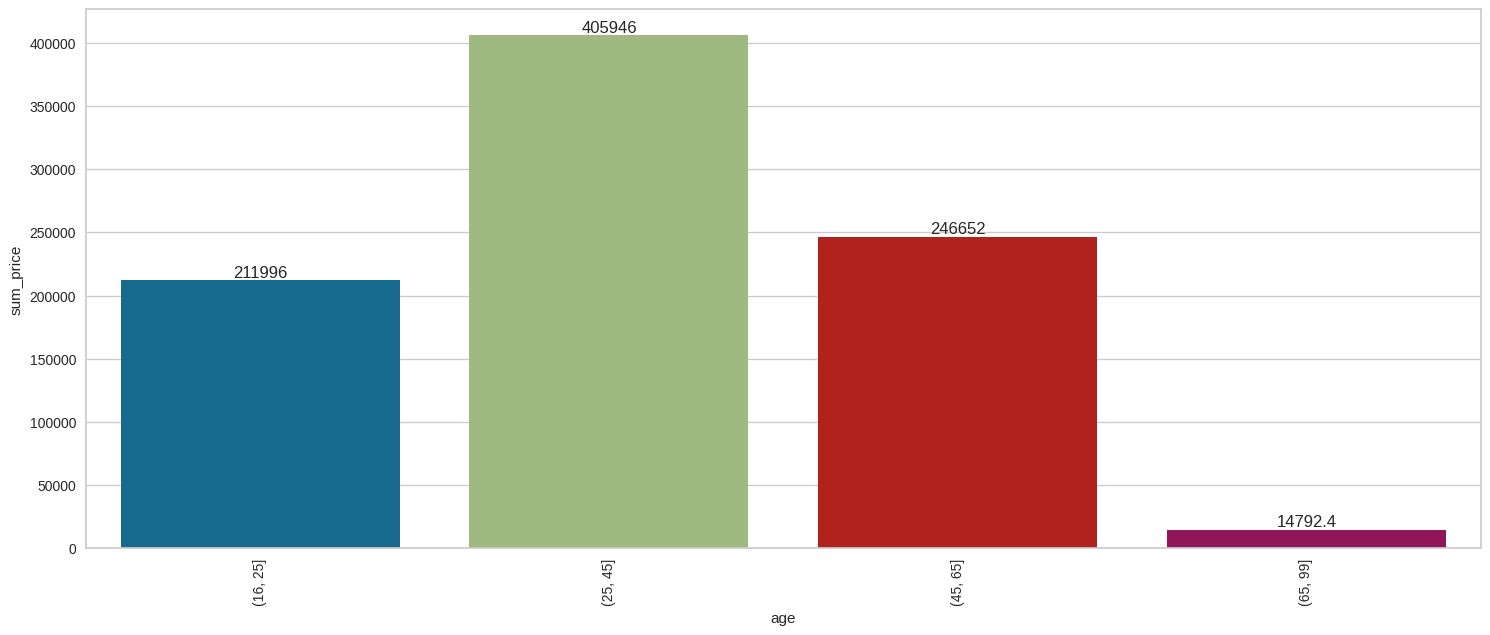

In [52]:
# Sum price by age
barplot(t_age_price, 'age', 'sum_price')

In [53]:
# create group by for customer total money
c_price = df_transaction.groupby(by='customer_id', as_index=False)['price'].sum()
c_price.columns = ['customer_id', 'sum_price']

# Sort values from high sum_purchase
c_price_sort = c_price.sort_values(by='sum_price', ascending=False)
c_price_sort.reset_index(drop=True, inplace=True)
c_price_sort.head()

,customer_id,sum_price
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.676407
1,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.921186
2,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,49.967169
3,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,47.682017
4,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.662000


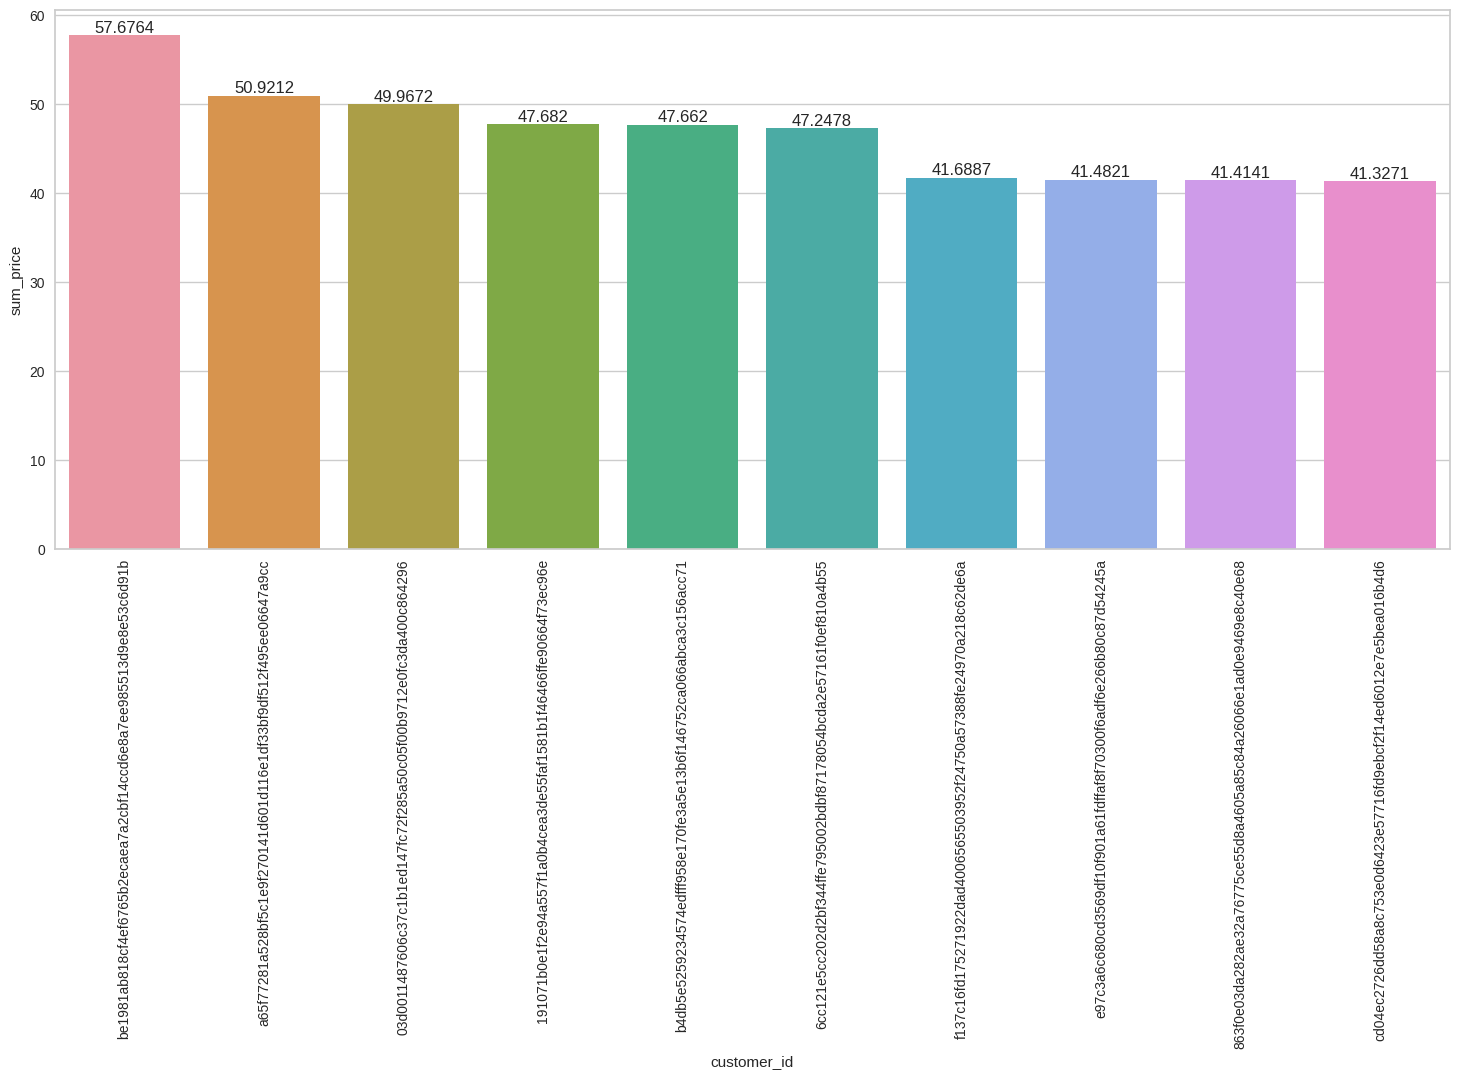

In [54]:
# Customers who have high total price

barplot(c_price_sort[:10],'customer_id','sum_price')

In [55]:
# create group by for customer total money
c_repeat = df_transaction.groupby(by='customer_id', as_index=False)['article_id'].count()
c_repeat.columns = ['customer_id', 'repeat_order']

# Sort values from high sum_purchase
c_repeat_sort = c_repeat.sort_values(by='repeat_order', ascending=False)
c_repeat_sort.reset_index(drop=True, inplace=True)
c_repeat_sort.head()

,customer_id,repeat_order
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237


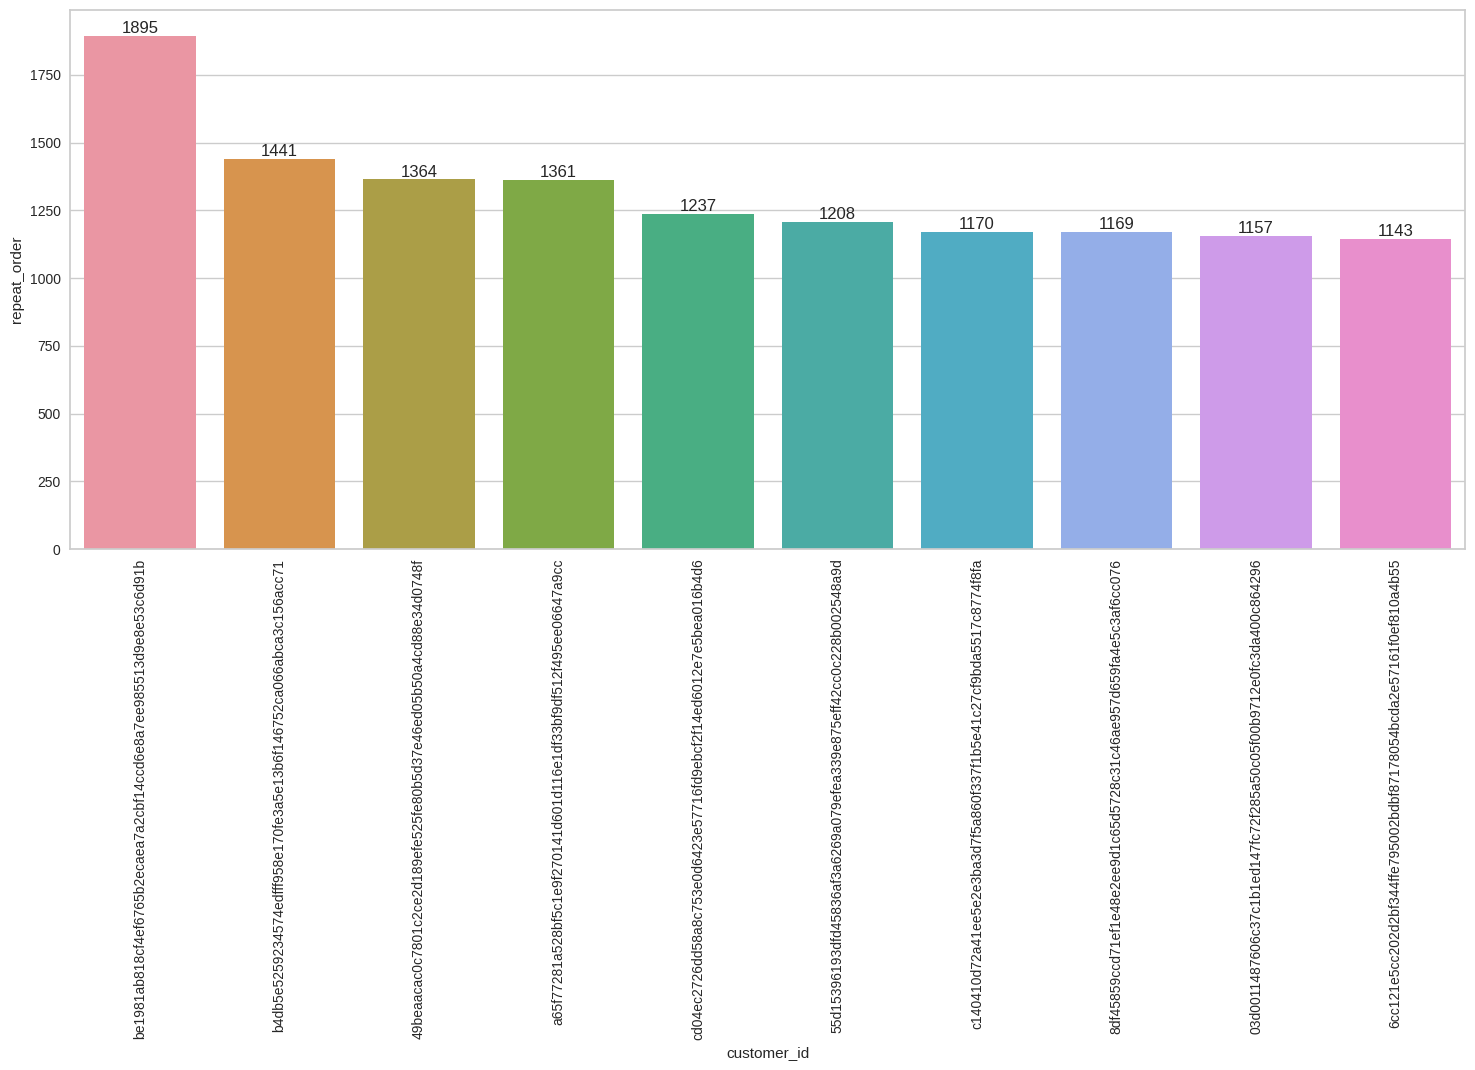

In [56]:
# Customer who has high repeat order
barplot(c_repeat_sort[:10],'customer_id','repeat_order')